In [1]:
from selfregulation.utils.utils import get_behav_data
import hddm
%matplotlib inline

/home/ian/anaconda2/envs/py34/lib/python3.4/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


### load data

In [2]:
df = get_behav_data(file='Individual_Measures/stroop.csv.gz')
response_col = 'correct'
condition_col = 'condition'

Getting datasets...:
 /home/ian/Experiments/expfactory/Self_Regulation_Ontology/Data/Discovery_01-31-2017


### data setup

In [3]:
# variables that don't vary by condition
fixed = ['t','a']
condition_vars = [var for var in ['a','v','t'] if var not in fixed]
depends_dict = {var: 'condition' for var in condition_vars}
# set up data
data = (df.loc[:,'rt']*.001).astype(float).to_frame()
data.insert(0, 'response', df[response_col].astype(float))
data.insert(0, 'condition', df[condition_col])
conditions = [i for i in data.condition.unique() if i]

# add subject ids 
data.insert(0,'subj_idx', df['worker_id'])
# remove missed responses and extremely short response
data = data.query('rt > .05')
subj_ids = data.subj_idx.unique()
ids = {subj_ids[i]:int(i) for i in range(len(subj_ids))}
data.replace(subj_ids, [ids[i] for i in subj_ids],inplace = True)

### fit model - in our normal fitting we use 40,000 samples and 3,000 burn samples

In [13]:
m = hddm.HDDM(data, depends_on=depends_dict)
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 10000 samples and discarding 1000 as burn-in
m.sample(10000, burn=100, thin = 2, dbname='traces.db', db='pickle')



/home/ian/anaconda2/envs/py34/lib/python3.4/site-packages/scipy/optimize/optimize.py:1876: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/ian/anaconda2/envs/py34/lib/python3.4/site-packages/scipy/optimize/optimize.py:1881: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/home/ian/anaconda2/envs/py34/lib/python3.4/site-packages/scipy/optimize/optimize.py:1877: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/ian/anaconda2/envs/py34/lib/python3.4/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-                 3%                  ] 37 of 1000 complete in 17.7 secHalting at iteration  36  of  1000


/home/ian/anaconda2/envs/py34/lib/python3.4/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


if we need to save the model

In [5]:
"""
try:
    m.save('hddm_test_model')
except Exception:
    print('Saving condition model failed')
"""

### investigate convergence

Plotting a
Plotting a_std
Plotting v(congruent)
Plotting v(incongruent)
Plotting v_std
Plotting t
Plotting t_std


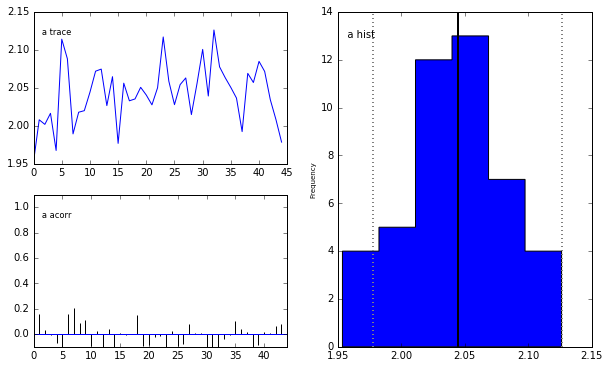

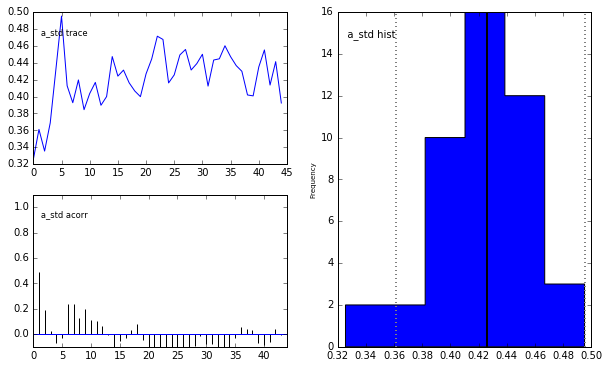

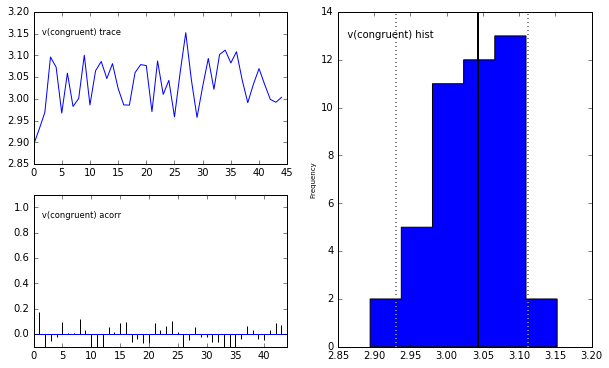

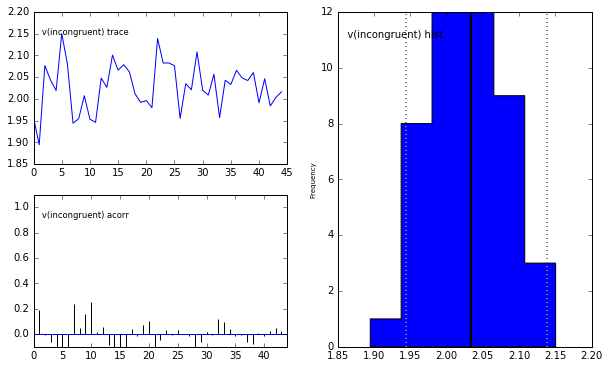

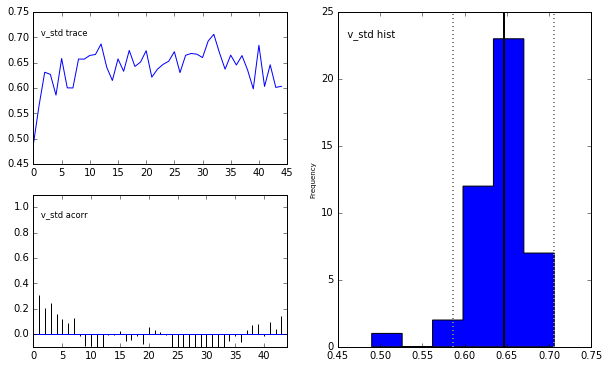

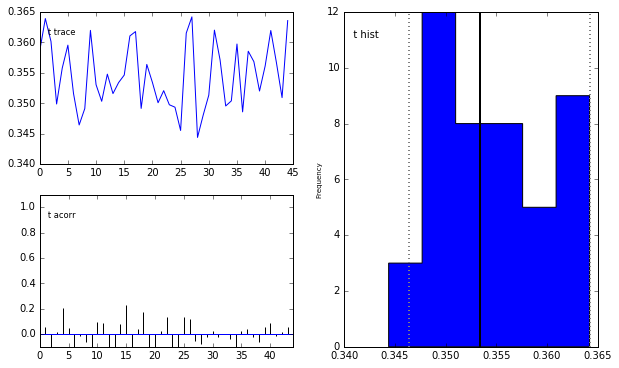

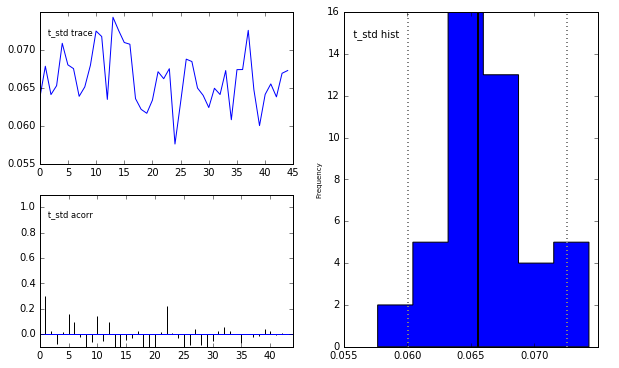

In [6]:
m.plot_posteriors()

### Plot posterior predictive

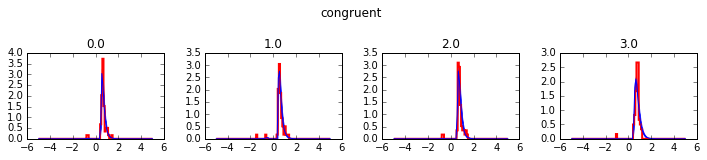

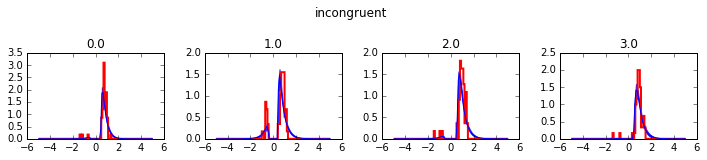

In [12]:
# not sure how to plot for a subset of subjects
m.plot_posterior_predictive(figsize=[12,8], columns=4, num_subjs=4)